In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
app = pd.read_csv('application_data.csv')
prev = pd.read_csv('previous_application.csv')

## Univariate

## Income of the client distribution 

In [3]:
app

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


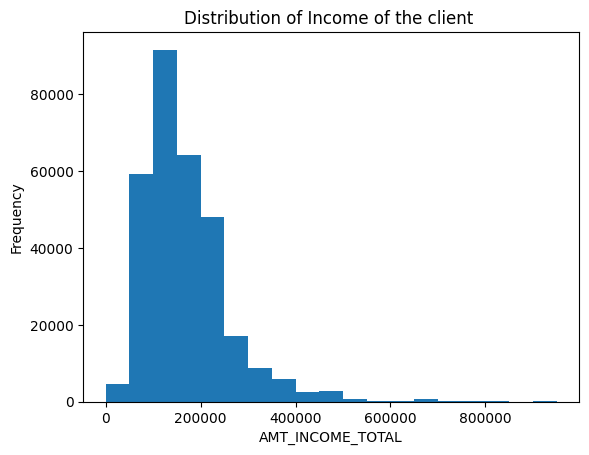

In [4]:
plt.hist(app['AMT_INCOME_TOTAL'],bins=range(0,1000000,50000))
plt.title("Distribution of Income of the client ")
plt.xlabel('AMT_INCOME_TOTAL')
plt.ylabel('Frequency')
plt.show()

## Loan annuity distribution

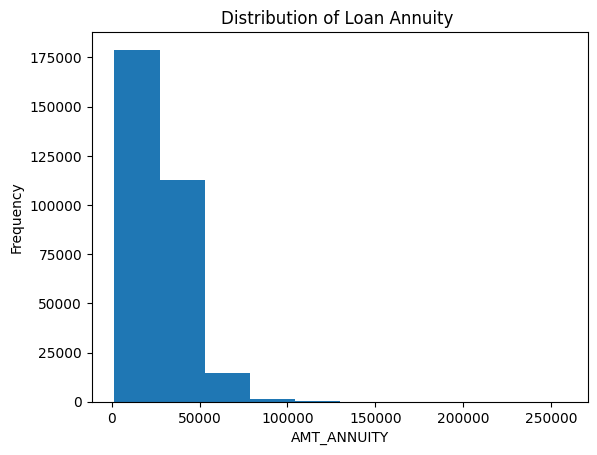

In [5]:
plt.hist(app['AMT_ANNUITY'])
plt.title("Distribution of Loan Annuity ")
plt.xlabel('AMT_ANNUITY')
plt.ylabel('Frequency')
plt.show()

##  price of the goods distribution 

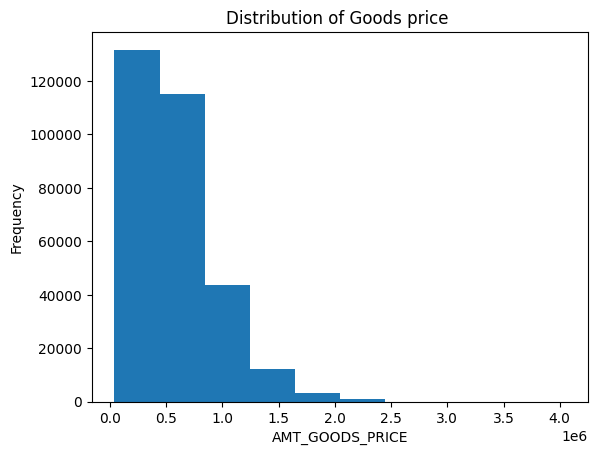

In [6]:
plt.hist(app['AMT_GOODS_PRICE'])
plt.title("Distribution of Goods price ")
plt.xlabel('AMT_GOODS_PRICE')
plt.ylabel('Frequency')
plt.show()

## accompanying client distribution 

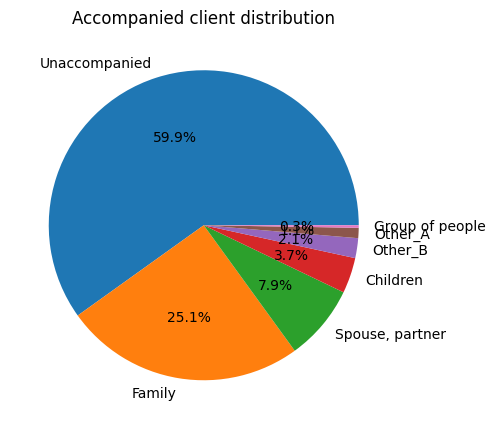

In [7]:
x=pd.DataFrame(prev["NAME_TYPE_SUITE"].value_counts())
plt.figure(figsize=(5,10))
plt.pie(x['count'],labels=x.index,autopct='%1.1f%%')
plt.title("Accompanied client distribution")
plt.show()

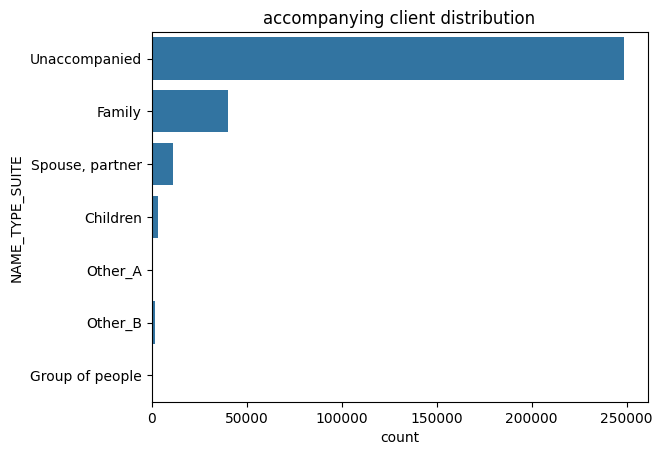

In [8]:
sns.countplot(y='NAME_TYPE_SUITE', data=app)
plt.title("accompanying client distribution")
plt.show()

## education the client distribution 

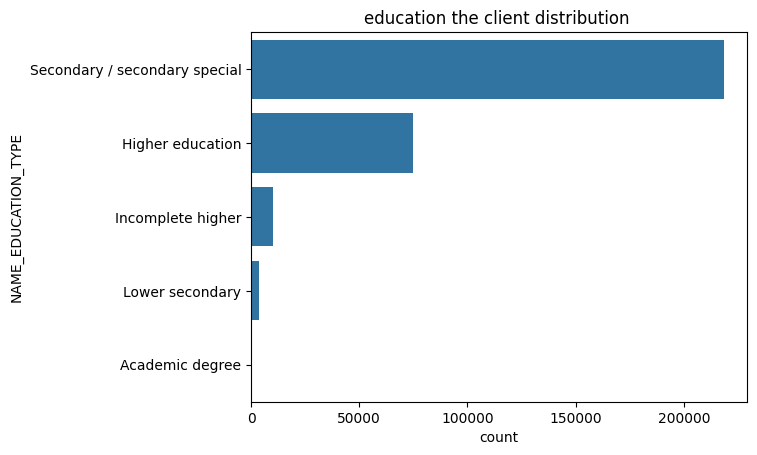

In [9]:
sns.countplot(y='NAME_EDUCATION_TYPE', data=app)
plt.title("education the client distribution ")
plt.show()

In [10]:
## relationship between amount credit and goods price

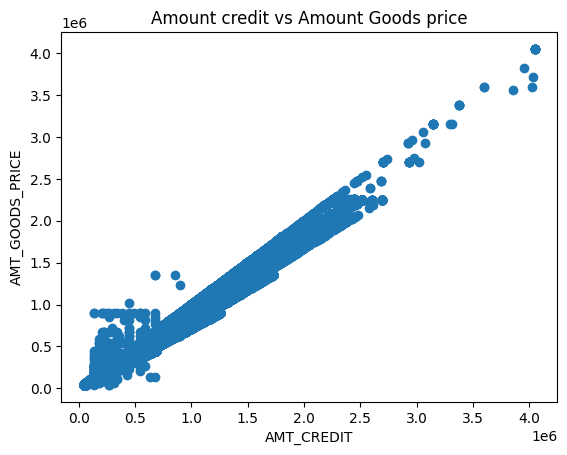

In [11]:
plt.scatter(app["AMT_CREDIT"], app["AMT_GOODS_PRICE"])
plt.title("Amount credit vs Amount Goods price")
plt.xlabel("AMT_CREDIT")
plt.ylabel("AMT_GOODS_PRICE")
plt.show()

## Organization type distribution 

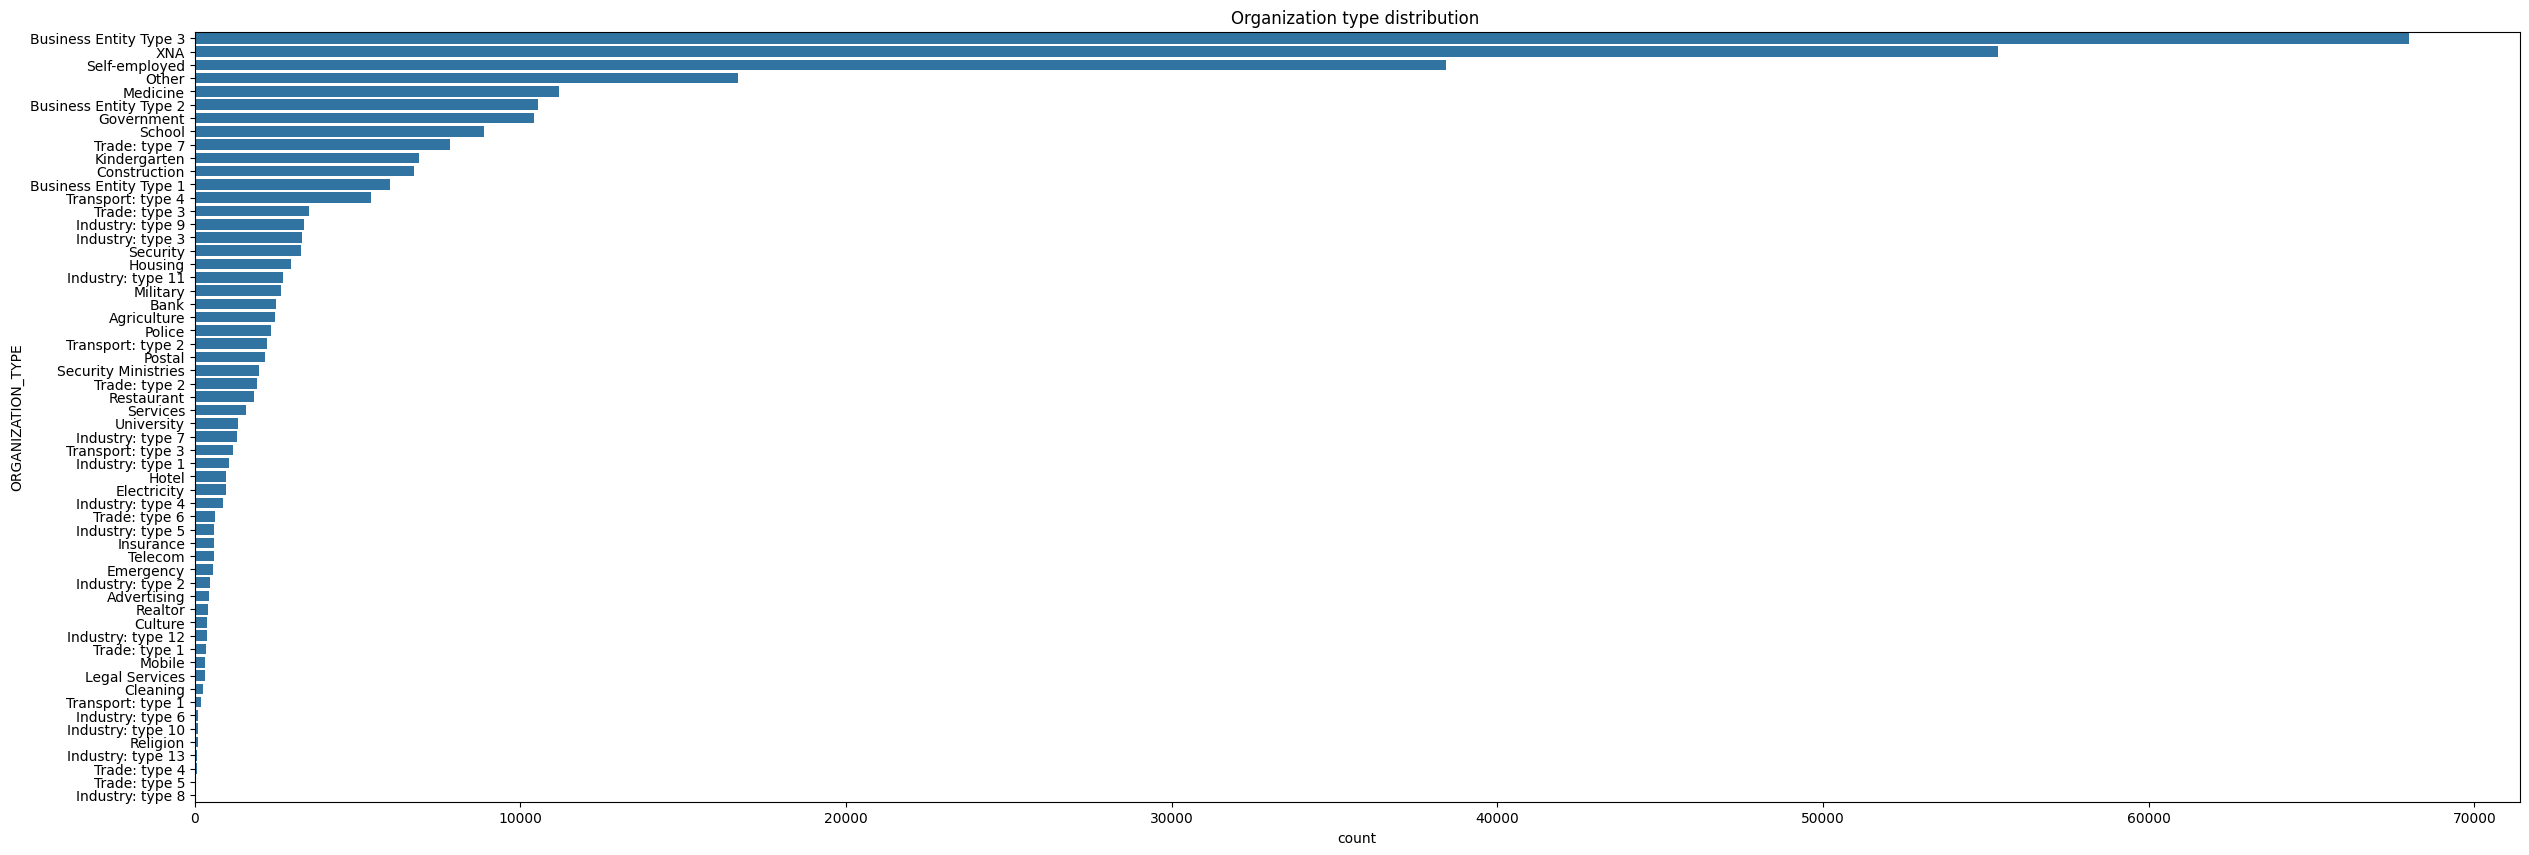

In [12]:
plt.figure(figsize=(30,10))
sns.countplot(y='ORGANIZATION_TYPE', data=app,order=app['ORGANIZATION_TYPE'].value_counts().index)
plt.title("Organization type distribution ")
plt.show()

## house type mode of the client distribution 

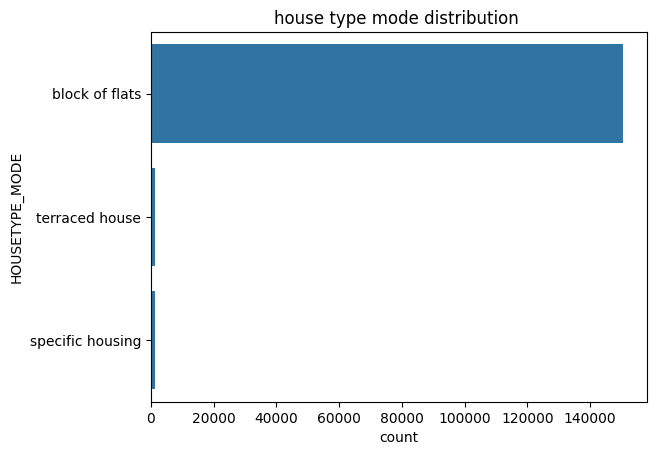

In [13]:
sns.countplot(y='HOUSETYPE_MODE', data=app)
plt.title("house type mode distribution ")
plt.show()

## Client's age in days distribution 

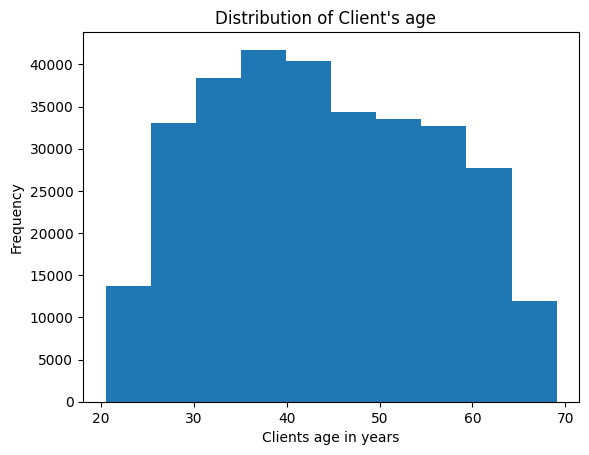

In [14]:
plt.hist(app['DAYS_BIRTH']*-1/365.25)
plt.title("Distribution of Client's age  ")
plt.xlabel('Clients age in years')
plt.ylabel('Frequency')
plt.show()

## rating of the region where client lives distribution

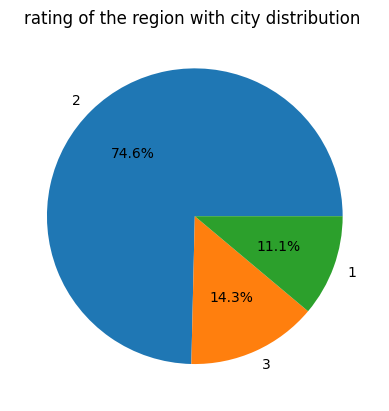

In [15]:
x=pd.DataFrame(app["REGION_RATING_CLIENT_W_CITY"].value_counts())

plt.pie(x['count'],labels=x.index,autopct='%1.1f%%')
plt.title("rating of the region with city distribution ")
plt.show()

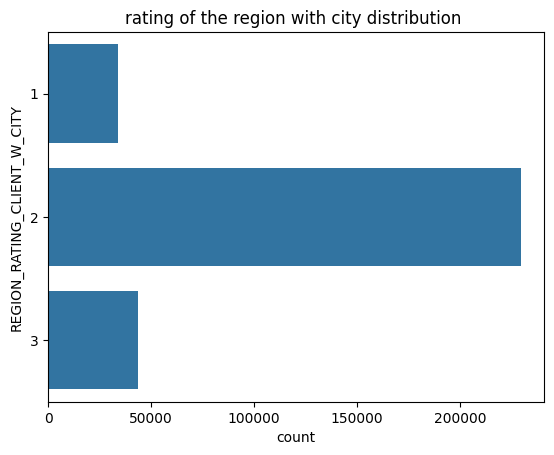

In [16]:
sns.countplot(y='REGION_RATING_CLIENT_W_CITY', data=app)
plt.title("rating of the region with city distribution ")
plt.show()

## capital repair fund distribution

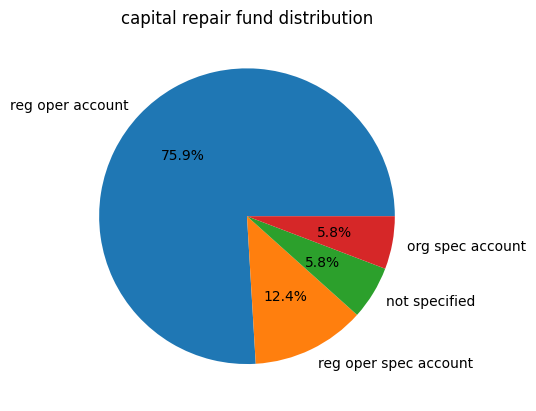

In [17]:
x=pd.DataFrame(app["FONDKAPREMONT_MODE"].value_counts())

plt.pie(x['count'],labels=x.index,autopct='%1.1f%%')
plt.title("capital repair fund distribution")
plt.show()

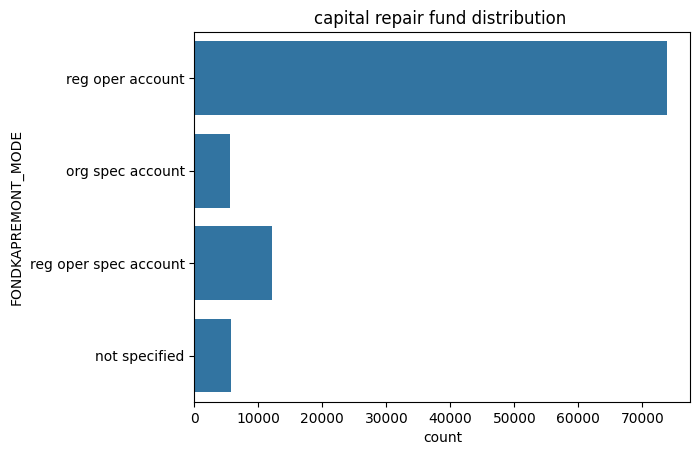

In [18]:
sns.countplot(y='FONDKAPREMONT_MODE', data=app)
plt.title("capital repair fund distribution ")
plt.show()

## Distribution of Flag mobile 

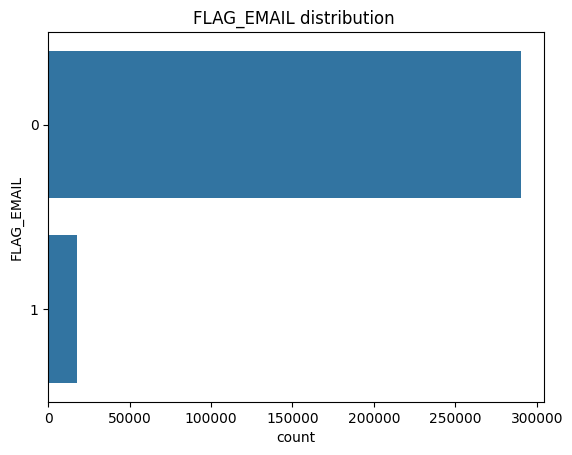

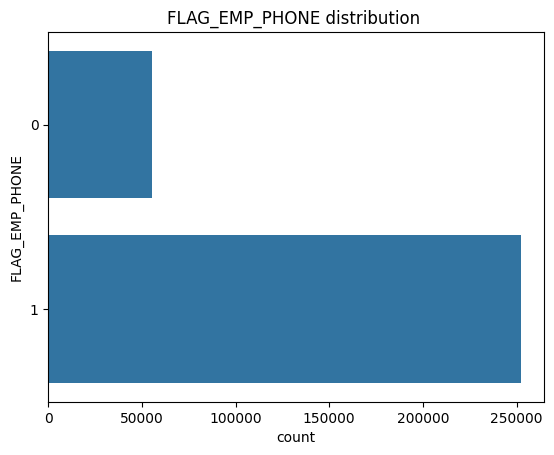

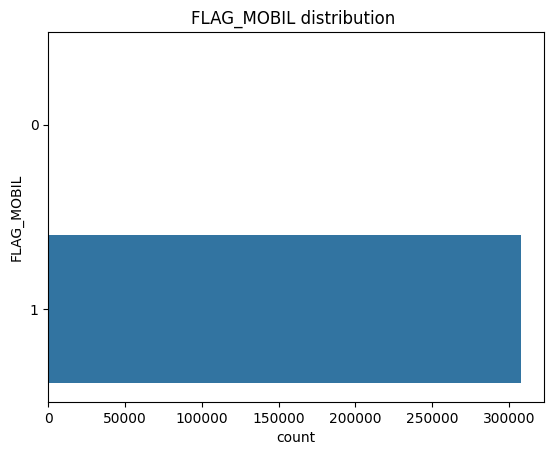

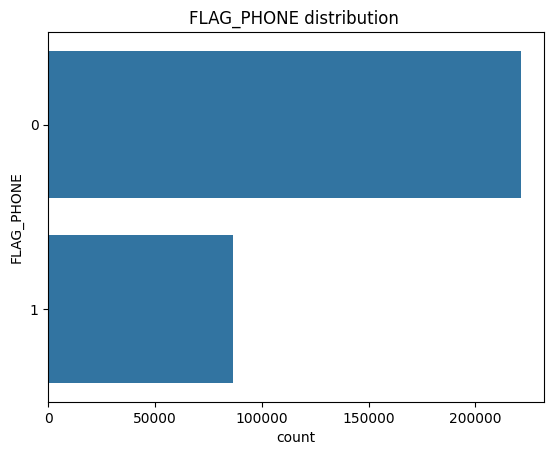

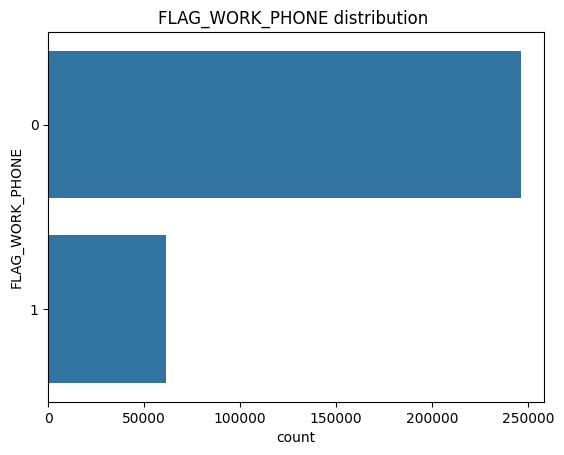

In [19]:
for i in ["FLAG_EMAIL","FLAG_EMP_PHONE","FLAG_MOBIL","FLAG_PHONE","FLAG_WORK_PHONE"
]:
    sns.countplot(y=i, data=app)
    plt.title(f"{i} distribution ")
    plt.show()

## bivariate

## Type of loan Vs Loan default 

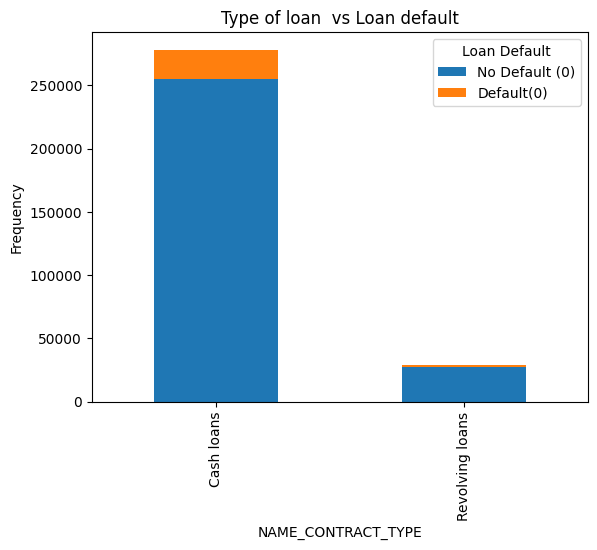

In [20]:

contract_target = pd.crosstab(app["NAME_CONTRACT_TYPE"], app['TARGET'])
contract_target.plot(kind='bar',stacked=True,legend=True)
plt.legend(title="Loan Default", labels=["No Default (0)","Default(0)"])
plt.title('Type of loan  vs Loan default')
plt.xlabel("NAME_CONTRACT_TYPE" )
plt.ylabel('Frequency')
plt.show()

## accompanying client vs loan default 

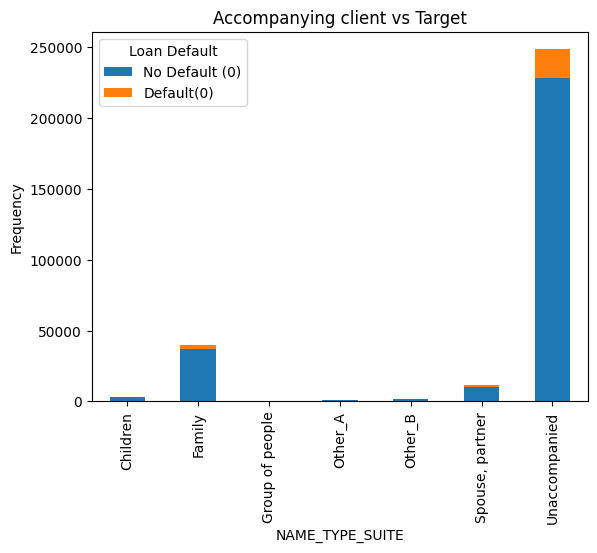

In [21]:
contract_target = pd.crosstab(app["NAME_TYPE_SUITE"], app['TARGET'])
contract_target.plot(kind='bar',stacked=True)
plt.title('Accompanying client vs Target')
plt.legend(title="Loan Default", labels=["No Default (0)","Default(0)"])
plt.xlabel("NAME_TYPE_SUITE" )
plt.ylabel('Frequency')
plt.show()

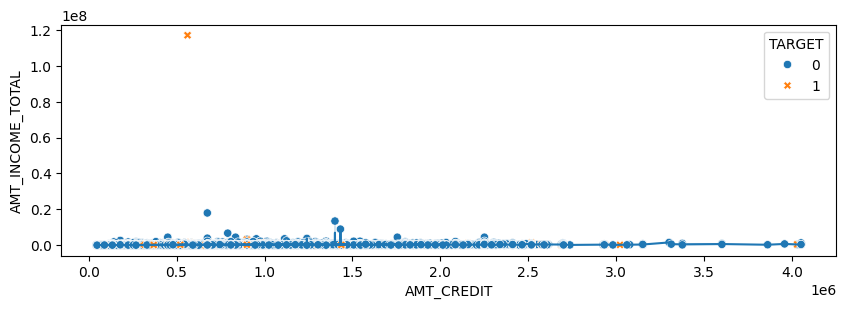

In [22]:
plt.figure(figsize=(10,3))
sns.lineplot(data=app,x="AMT_CREDIT",y="AMT_INCOME_TOTAL")
sns.scatterplot(data=app,x="AMT_CREDIT",y="AMT_INCOME_TOTAL",hue="TARGET",style="TARGET")
plt.show()

## Education vs loan default 

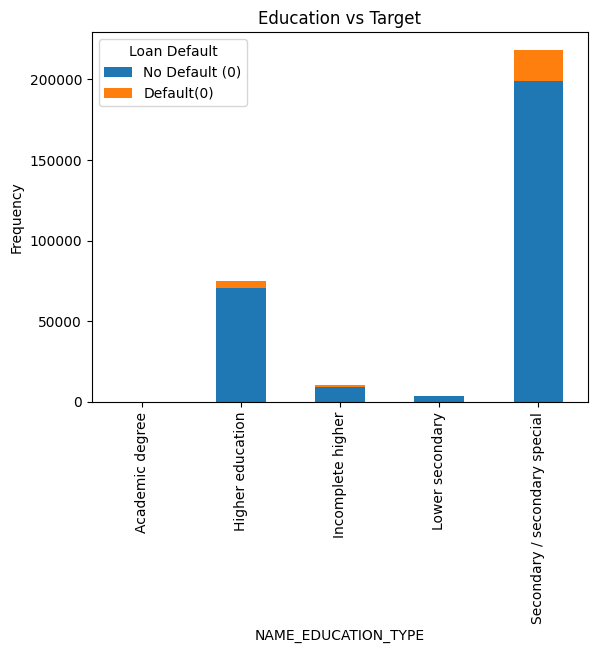

In [23]:
contract_target = pd.crosstab(app["NAME_EDUCATION_TYPE"], app['TARGET'])
contract_target.plot(kind='bar',stacked=True)
plt.legend(title="Loan Default", labels=["No Default (0)","Default(0)"])
plt.title('Education vs Target')
plt.xlabel("NAME_EDUCATION_TYPE" )
plt.ylabel('Frequency')
plt.show()

## Occupation vs loan default

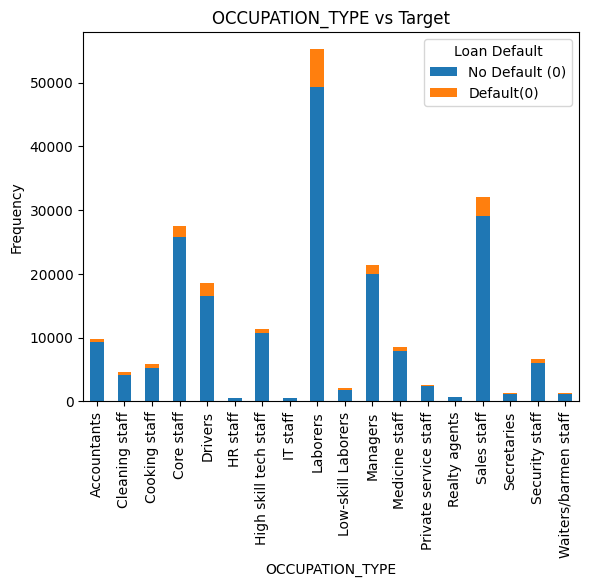

In [24]:
contract_target = pd.crosstab(app["OCCUPATION_TYPE"], app['TARGET'])
contract_target.plot(kind='bar',stacked=True)
plt.title('OCCUPATION_TYPE vs Target')
plt.legend(title="Loan Default", labels=["No Default (0)","Default(0)"])
plt.xlabel("OCCUPATION_TYPE" )
plt.ylabel('Frequency')
plt.show()

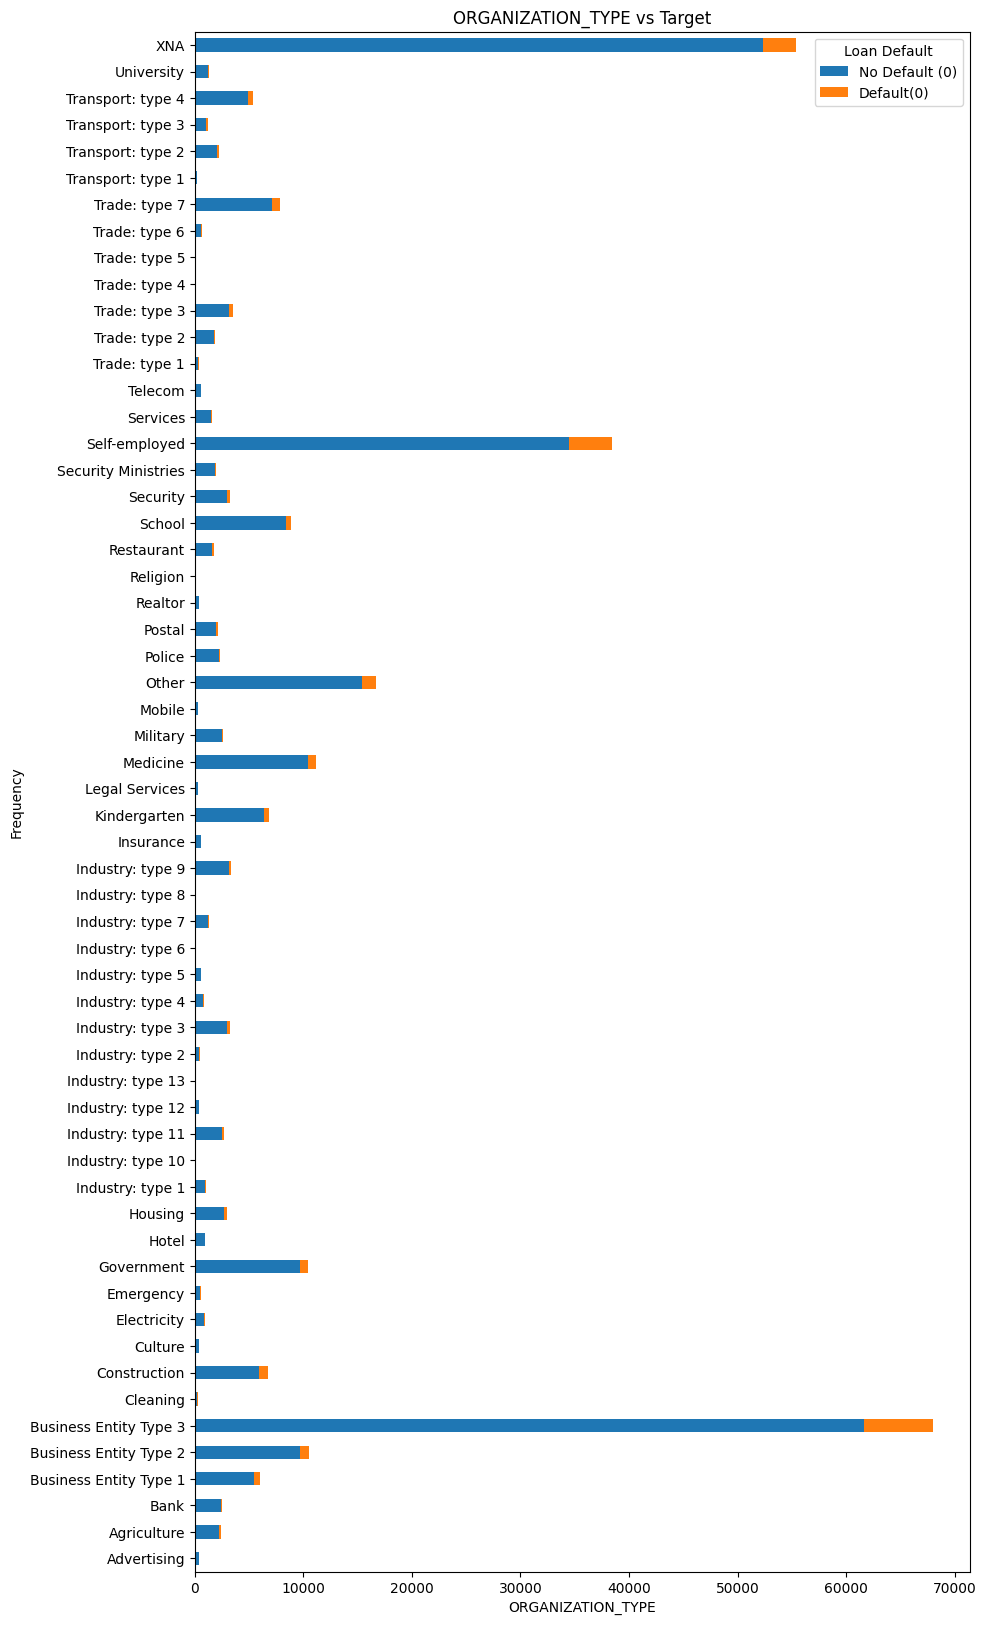

In [25]:
contract_target = pd.crosstab(app["ORGANIZATION_TYPE"],app['TARGET'])
contract_target.plot(kind='barh',stacked=True,figsize=(10,20))
plt.legend(title="Loan Default", labels=["No Default (0)","Default(0)"])
plt.title('ORGANIZATION_TYPE vs Target')
plt.xlabel("ORGANIZATION_TYPE" )
plt.ylabel('Frequency')
plt.show()

## capital repair fund vs loan default 

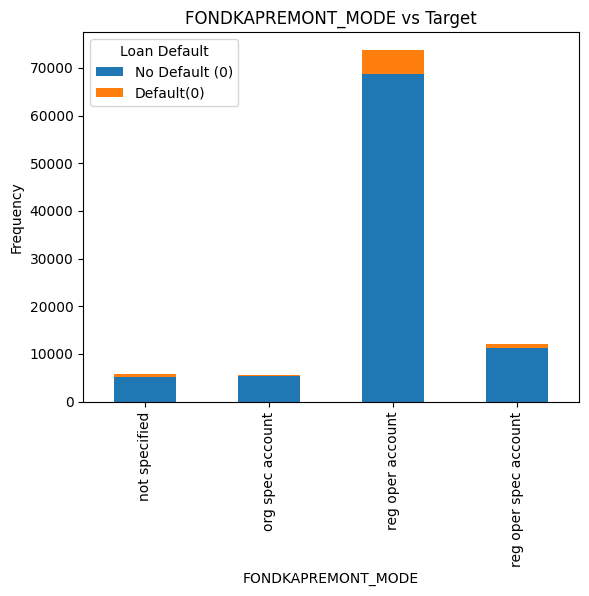

In [26]:
contract_target = pd.crosstab(app["FONDKAPREMONT_MODE"],app['TARGET'])
contract_target.plot(kind='bar',stacked=True)
plt.legend(title="Loan Default", labels=["No Default (0)","Default(0)"])
plt.title('FONDKAPREMONT_MODE vs Target')
plt.xlabel("FONDKAPREMONT_MODE" )
plt.ylabel('Frequency')
plt.show()

## House type mode vs loan default 

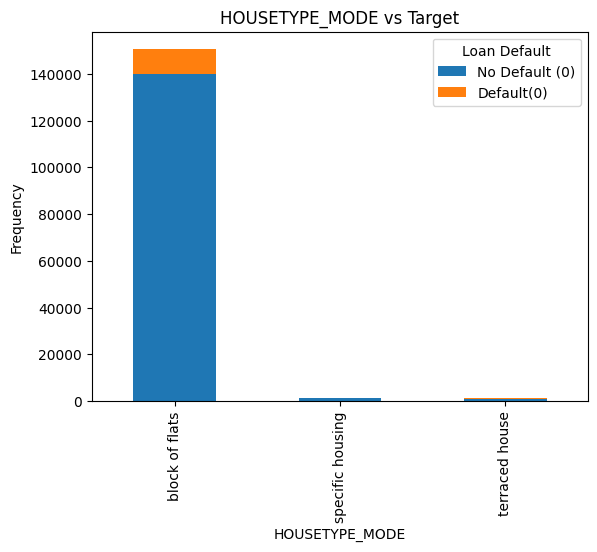

In [27]:
contract_target = pd.crosstab(app["HOUSETYPE_MODE"],app['TARGET'])
contract_target.plot(kind='bar',stacked=True)
plt.legend(title="Loan Default", labels=["No Default (0)","Default(0)"])
plt.title('HOUSETYPE_MODE vs Target')
plt.xlabel("HOUSETYPE_MODE" )
plt.ylabel('Frequency')
plt.show()

## Flag documents vs loan default 

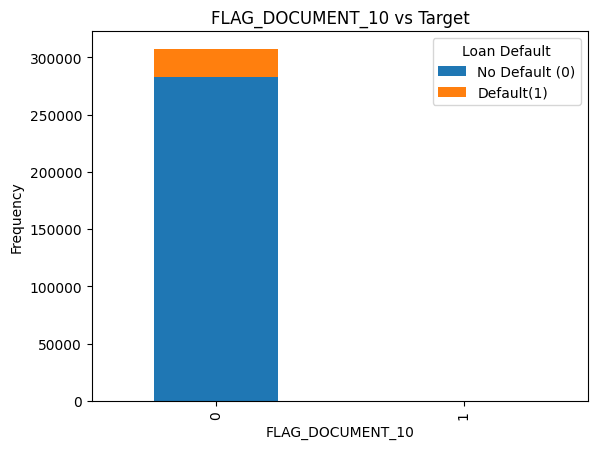

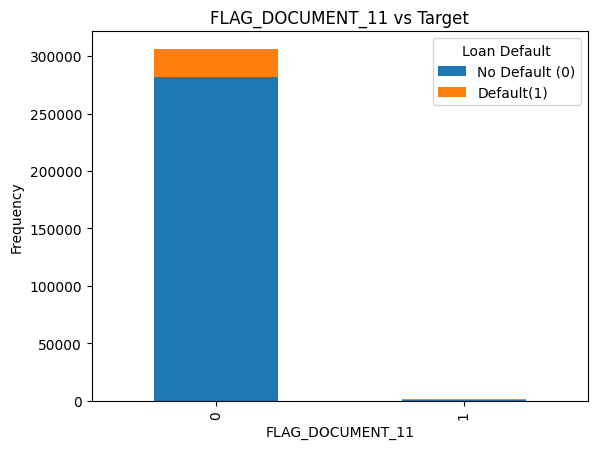

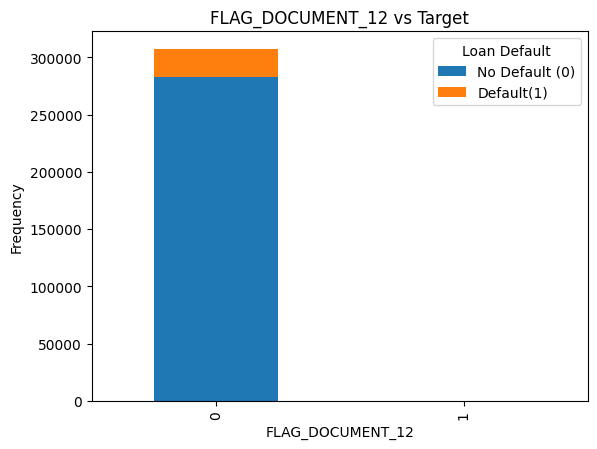

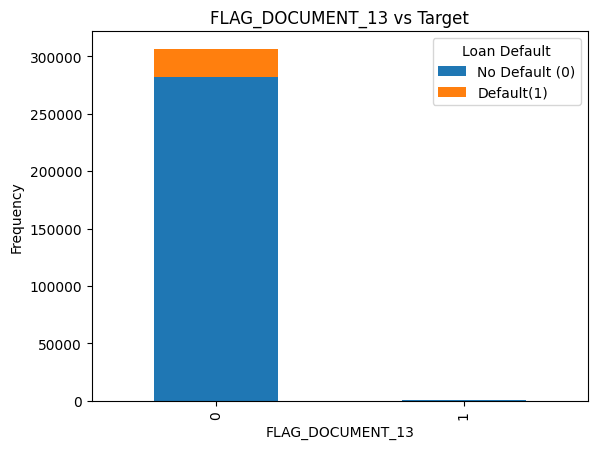

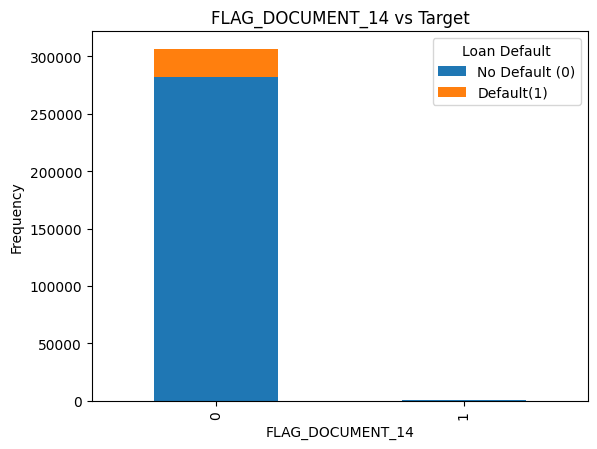

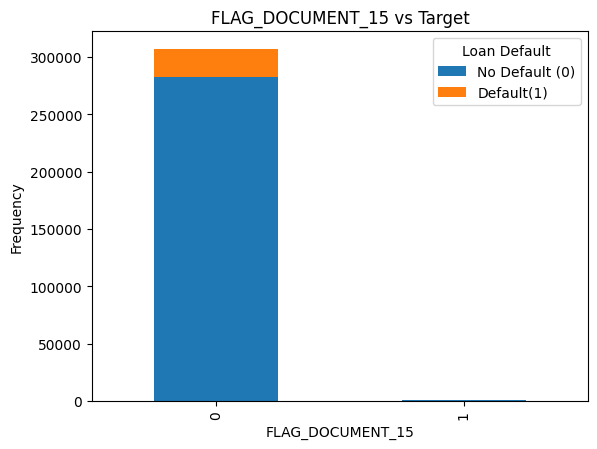

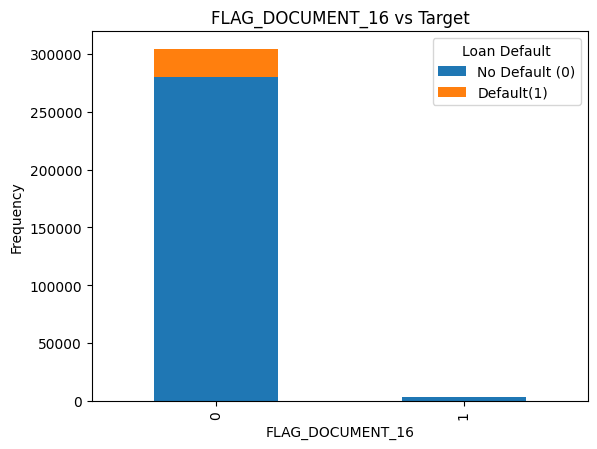

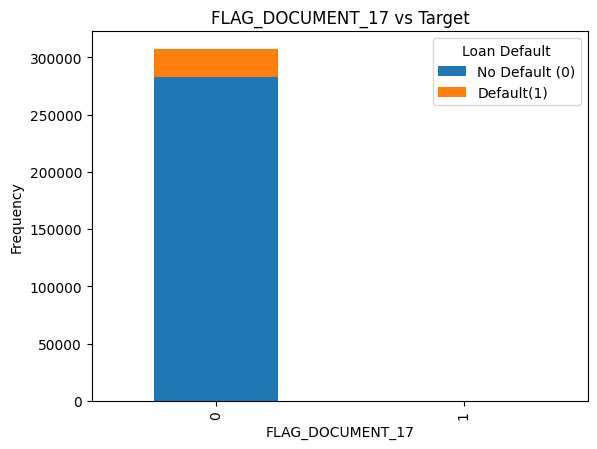

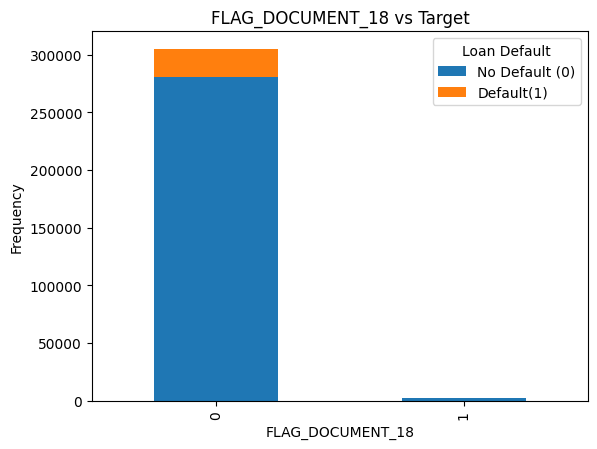

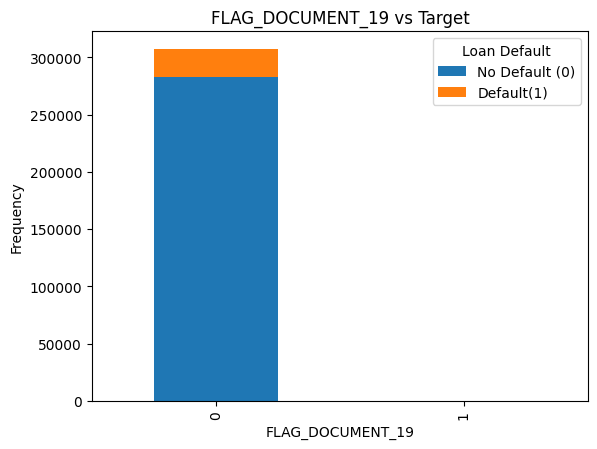

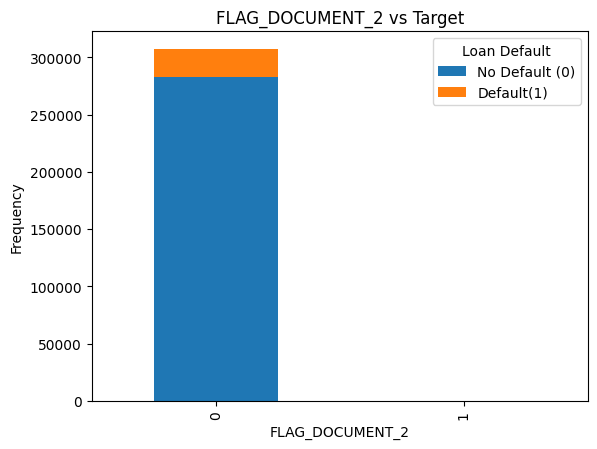

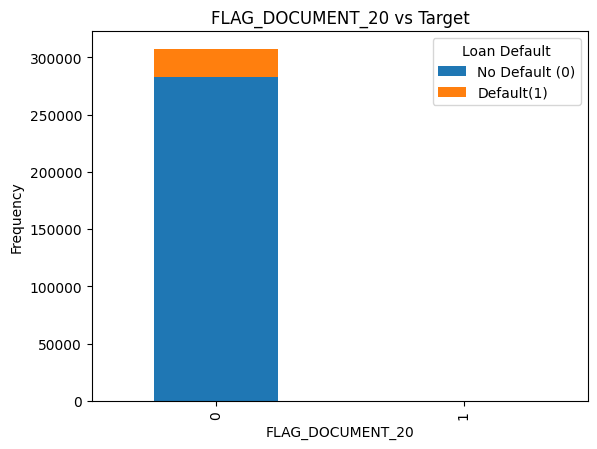

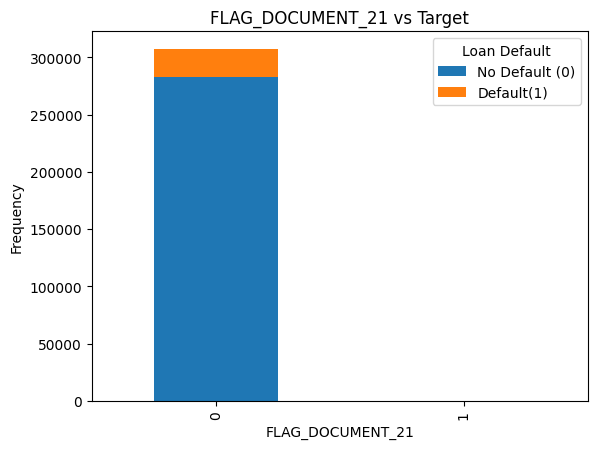

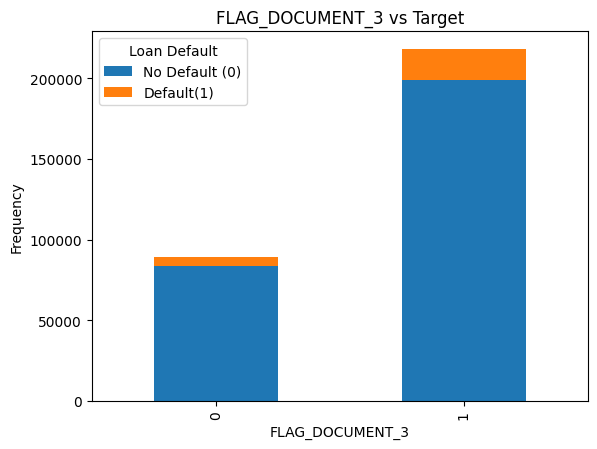

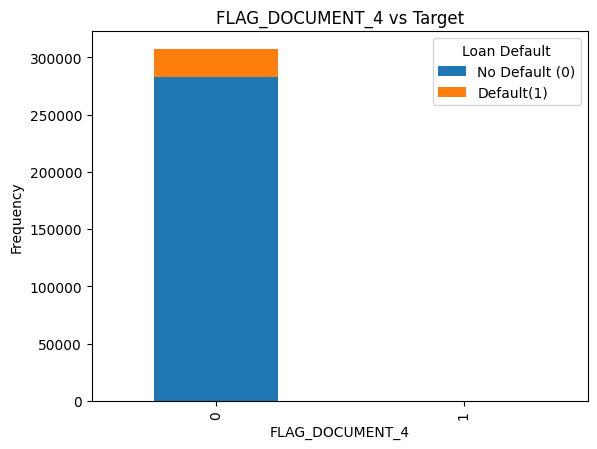

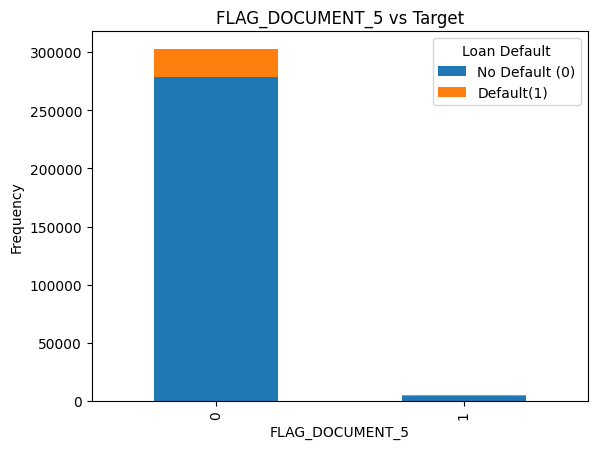

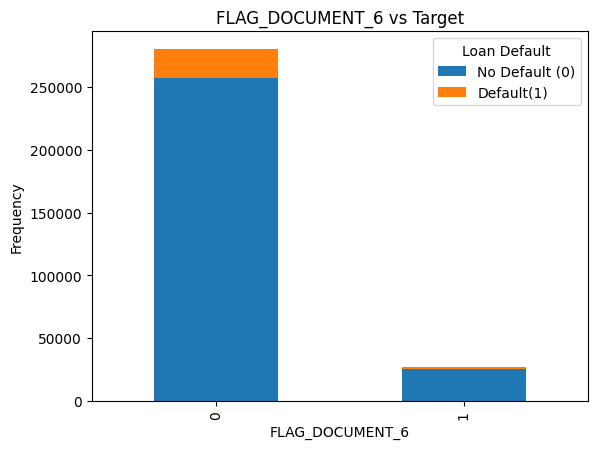

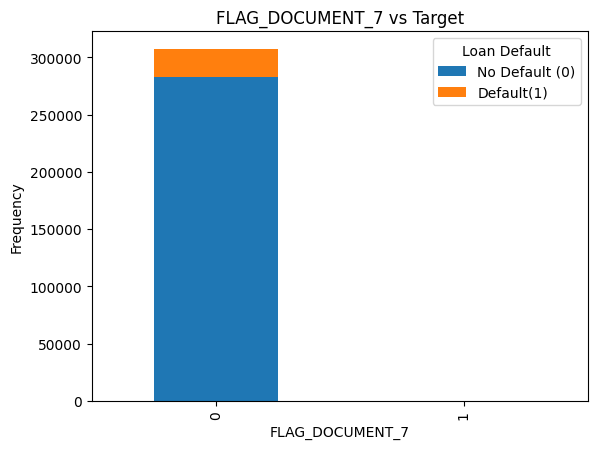

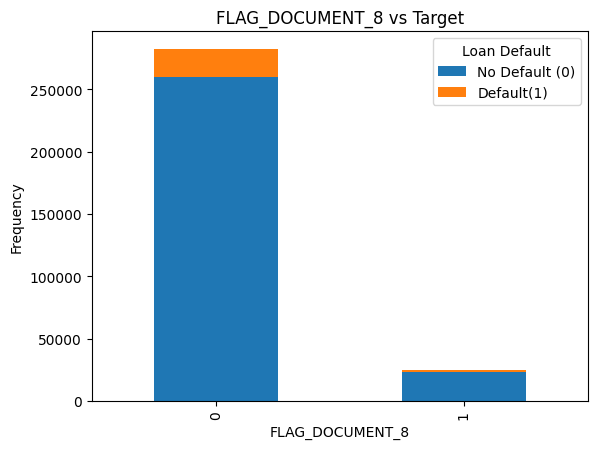

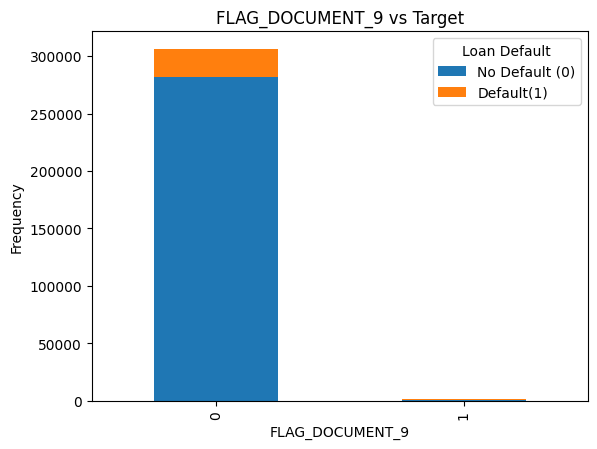

In [28]:
for i in ["FLAG_DOCUMENT_10",
            "FLAG_DOCUMENT_11",
            "FLAG_DOCUMENT_12",
            "FLAG_DOCUMENT_13",
            "FLAG_DOCUMENT_14",
            "FLAG_DOCUMENT_15",
            "FLAG_DOCUMENT_16",
            "FLAG_DOCUMENT_17",
            "FLAG_DOCUMENT_18",
            "FLAG_DOCUMENT_19",
            "FLAG_DOCUMENT_2",
            "FLAG_DOCUMENT_20",
            "FLAG_DOCUMENT_21",
            "FLAG_DOCUMENT_3",
            "FLAG_DOCUMENT_4",
            "FLAG_DOCUMENT_5",
            "FLAG_DOCUMENT_6",
            "FLAG_DOCUMENT_7",
            "FLAG_DOCUMENT_8",
            "FLAG_DOCUMENT_9"]:
    contract_target = pd.crosstab(app[i],app['TARGET'])
    contract_target.plot(kind='bar',stacked=True)
    plt.legend(title="Loan Default", labels=["No Default (0)","Default(1)"])
    plt.title(f'{i} vs Target')
    plt.xlabel(i )
    plt.ylabel('Frequency')
    plt.show()

## previous application

## Purpose of cash loan distribution 

In [29]:
x

,count
FONDKAPREMONT_MODE,
reg oper account,73830
reg oper spec account,12080
not specified,5687
org spec account,5619


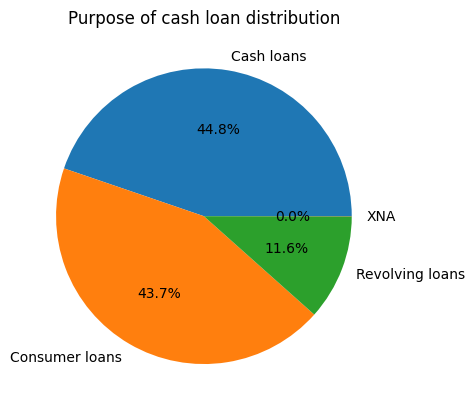

In [30]:
x=pd.DataFrame(prev["NAME_CONTRACT_TYPE"].value_counts())

plt.pie(x['count'],labels=x.index,autopct='%1.1f%%')
plt.title("Purpose of cash loan distribution")
plt.show()

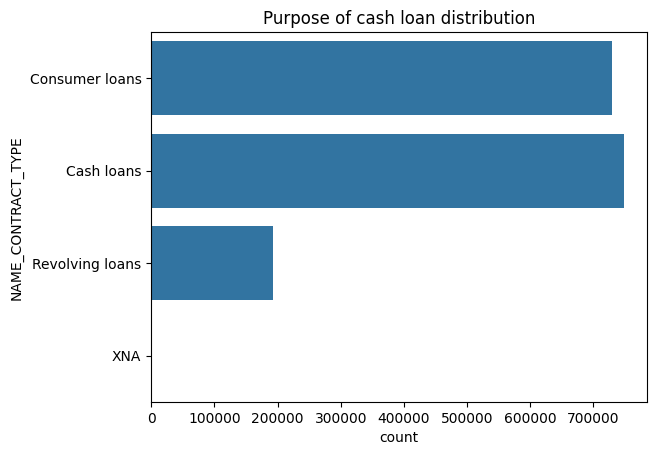

In [31]:
sns.countplot(y='NAME_CONTRACT_TYPE', data=prev)
plt.title("Purpose of cash loan distribution")
plt.show()

## Contract status distribution 

In [32]:
x

,count
NAME_CONTRACT_TYPE,
Cash loans,747553
Consumer loans,729151
Revolving loans,193164
XNA,346


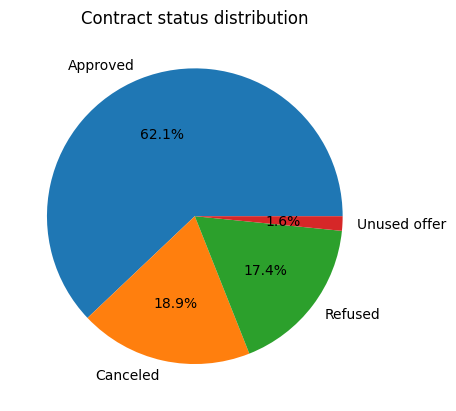

In [33]:
x=pd.DataFrame(prev["NAME_CONTRACT_STATUS"].value_counts())

plt.pie(x['count'],labels=x.index,autopct='%1.1f%%')
plt.title("Contract status distribution")
plt.show()

<Axes: xlabel='count', ylabel='NAME_CONTRACT_STATUS'>

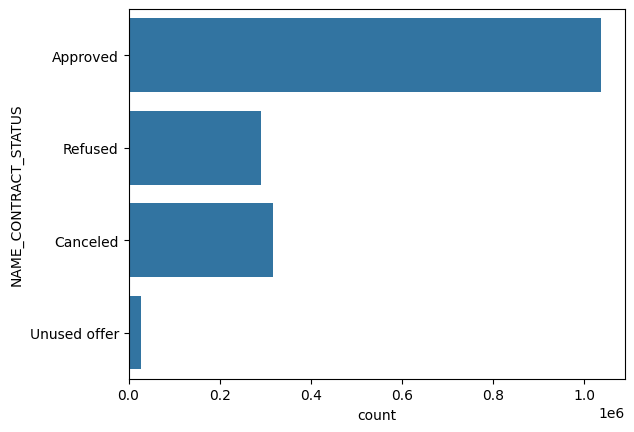

In [34]:
sns.countplot(y='NAME_CONTRACT_STATUS', data=prev)


## Days of decision distribution 

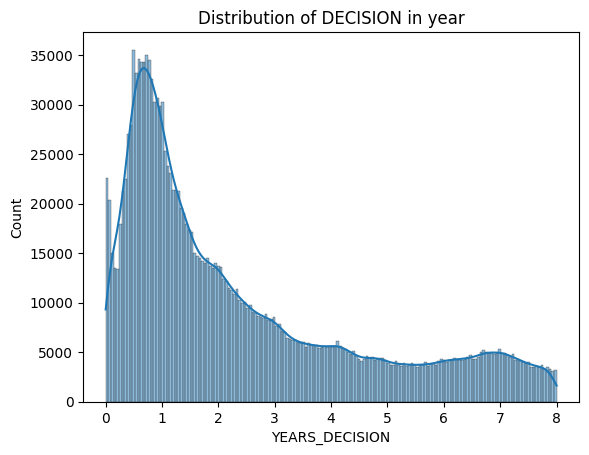

In [35]:
sns.histplot(prev['DAYS_DECISION']*-1/365.25,kde=True)
plt.title("Distribution of DECISION in year")
plt.xlabel("YEARS_DECISION" )
plt.show()

## Payment method distribution 

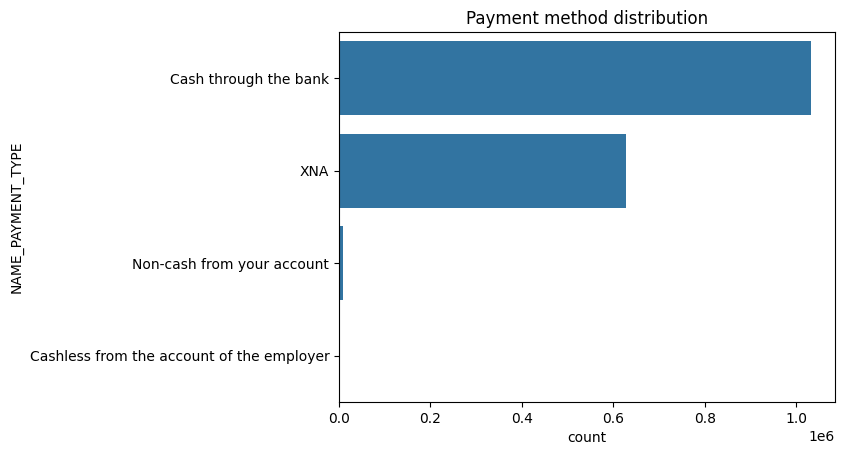

In [36]:
sns.countplot(y='NAME_PAYMENT_TYPE', data=prev)
plt.title("Payment method distribution")
plt.show()

## Reject code distribution 

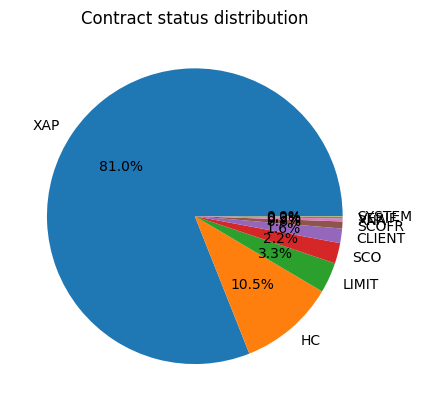

In [37]:
x=pd.DataFrame(prev["CODE_REJECT_REASON"].value_counts())

plt.pie(x['count'],labels=x.index,autopct='%1.1f%%')
plt.title("Contract status distribution")
plt.show()

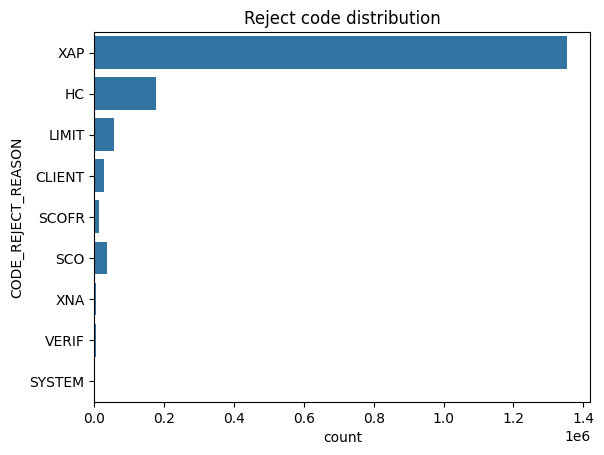

In [38]:
sns.countplot(y='CODE_REJECT_REASON', data=prev)
plt.title("Reject code distribution")
plt.show()


## Accompanied client distribution 

In [39]:
x

,count
CODE_REJECT_REASON,
XAP,1353093
HC,175231
LIMIT,55680
SCO,37467
CLIENT,26436
SCOFR,12811
XNA,5244
VERIF,3535
SYSTEM,717


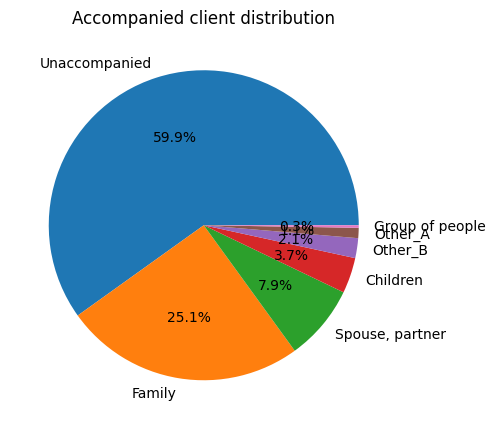

In [40]:
x=pd.DataFrame(prev["NAME_TYPE_SUITE"].value_counts())
plt.figure(figsize=(5,10))
plt.pie(x['count'],labels=x.index,autopct='%1.1f%%')
plt.title("Accompanied client distribution")
plt.show()

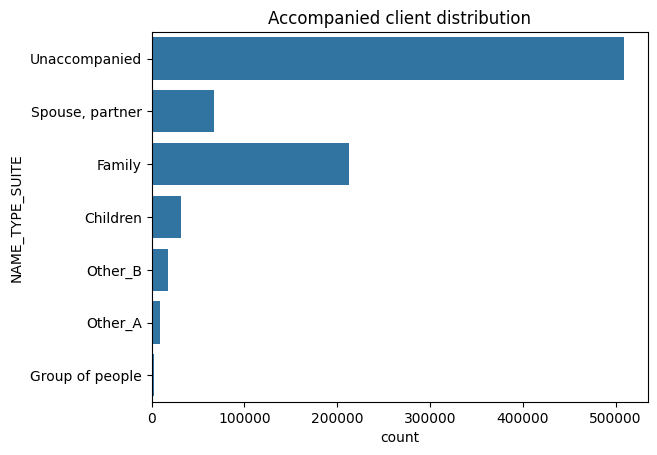

In [41]:
sns.countplot(y='NAME_TYPE_SUITE', data=prev)
plt.title("Accompanied client distribution")
plt.show()


## Client type distribution 

In [42]:
x

,count
NAME_TYPE_SUITE,
Unaccompanied,508970
Family,213263
"Spouse, partner",67069
Children,31566
Other_B,17624
Other_A,9077
Group of people,2240


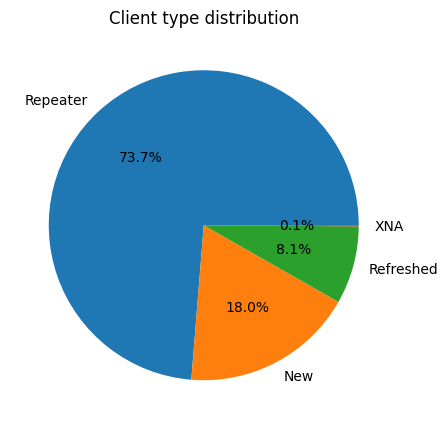

In [43]:
x=pd.DataFrame(prev["NAME_CLIENT_TYPE"].value_counts())
plt.figure(figsize=(5,10))
plt.pie(x['count'],labels=x.index,autopct='%1.1f%%')
plt.title("Client type distribution")
plt.show()

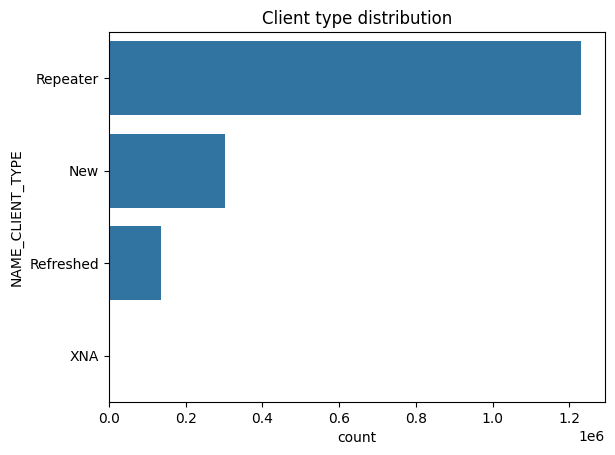

In [44]:
sns.countplot(y='NAME_CLIENT_TYPE', data=prev)
plt.title("Client type distribution")
plt.show()


## Type of goods distribution 

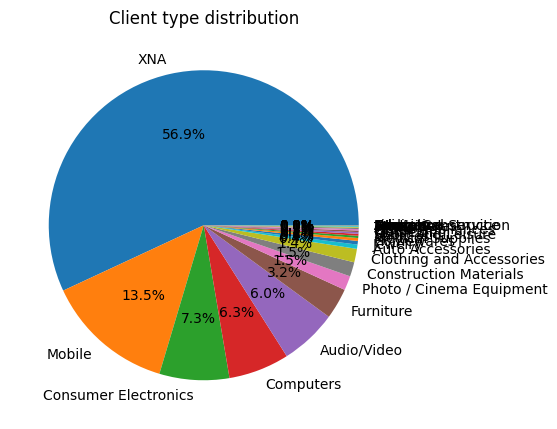

In [45]:
x=pd.DataFrame(prev["NAME_GOODS_CATEGORY"].value_counts())
plt.figure(figsize=(5,10))
plt.pie(x['count'],labels=x.index,autopct='%1.1f%%')
plt.title("Client type distribution")
plt.show()

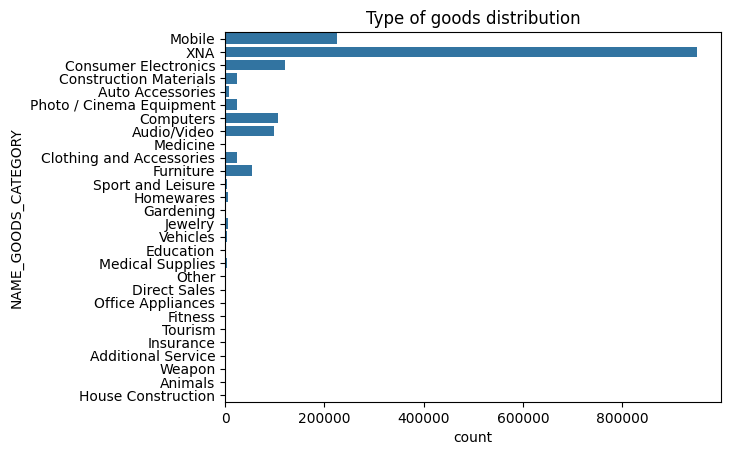

In [46]:
sns.countplot(y='NAME_GOODS_CATEGORY', data=prev)
plt.title("Type of goods distribution")
plt.show()

## Channel distribution 

In [47]:
x

,count
NAME_GOODS_CATEGORY,
XNA,950809
Mobile,224708
Consumer Electronics,121576
Computers,105769
Audio/Video,99441
Furniture,53656
Photo / Cinema Equipment,25021
Construction Materials,24995
Clothing and Accessories,23554


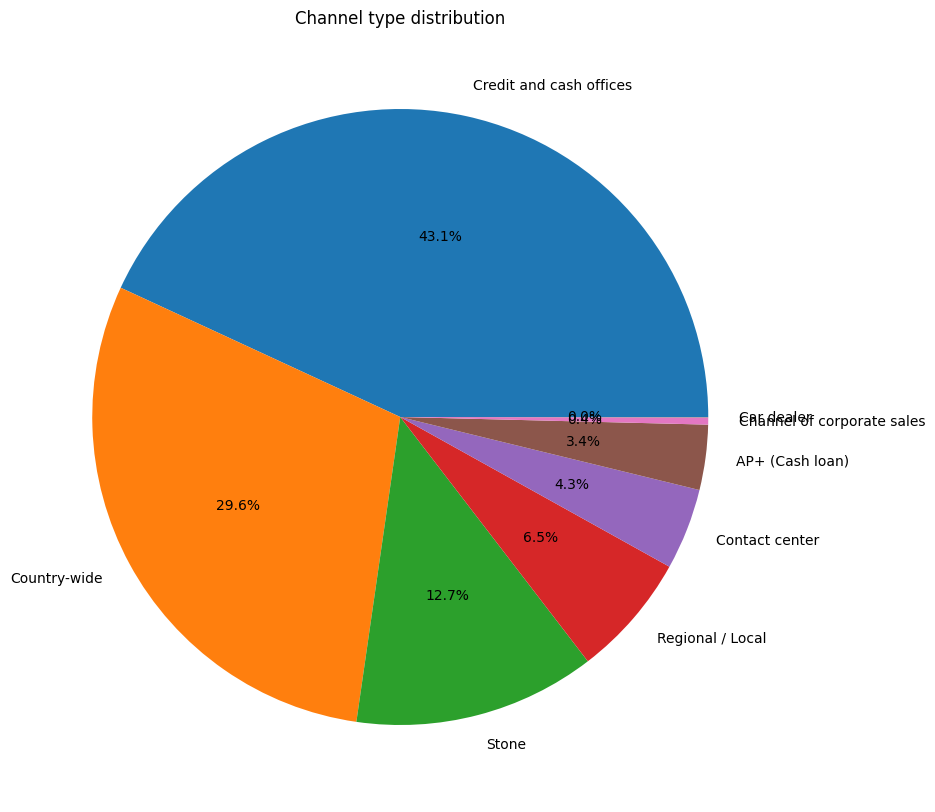

In [48]:
x=pd.DataFrame(prev["CHANNEL_TYPE"].value_counts())
plt.figure(figsize=(10,10))
plt.pie(x['count'],labels=x.index,autopct='%1.1f%%')
plt.title("Channel type distribution")
plt.show()

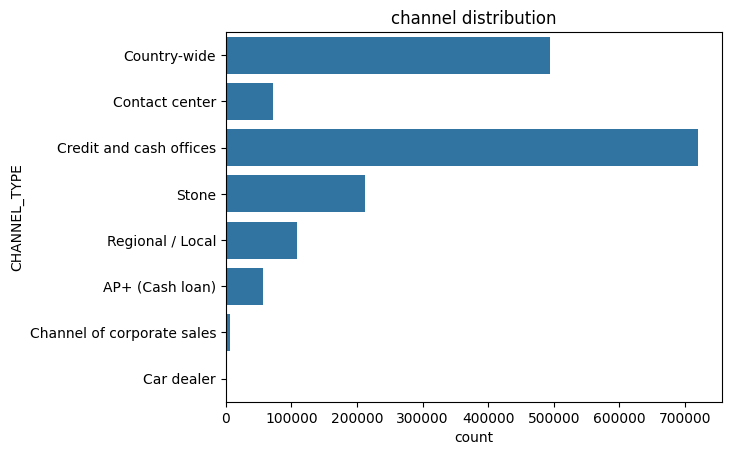

In [49]:
sns.countplot(y='CHANNEL_TYPE', data=prev)
plt.title("channel distribution")
plt.show()

## Grouped interest rate distribution 

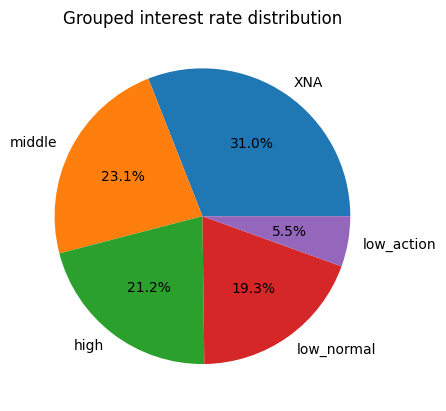

In [50]:

x=pd.DataFrame(prev["NAME_YIELD_GROUP"].value_counts())

plt.pie(x['count'],labels=x.index,autopct='%1.1f%%')
plt.title("Grouped interest rate distribution")
plt.show()

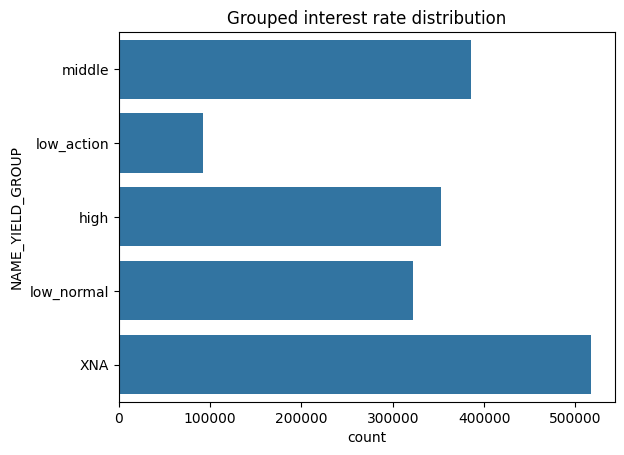

In [51]:
sns.countplot(y='NAME_YIELD_GROUP', data=prev)
plt.title("Grouped interest rate distribution")
plt.show()

## Annuity distribution 

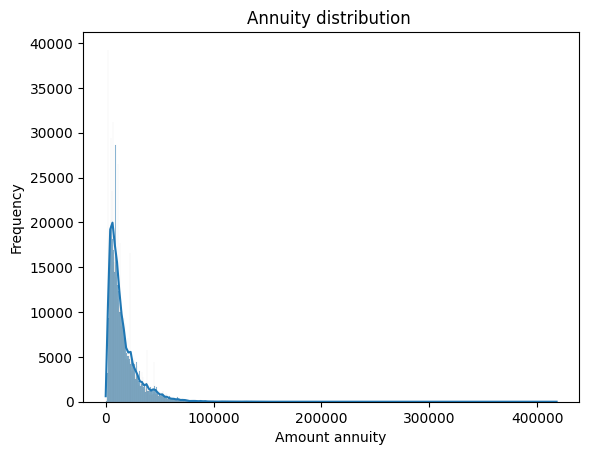

In [52]:
sns.histplot(prev['AMT_ANNUITY'],kde=True)
plt.title("Annuity distribution ")
plt.xlabel('Amount annuity')
plt.ylabel('Frequency')
plt.show()

## Application amount distribution 

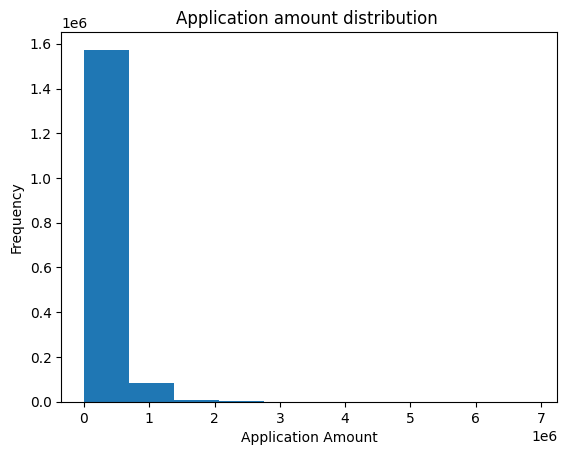

In [53]:
plt.hist(prev['AMT_APPLICATION'])
plt.title("Application amount distribution ")
plt.xlabel('Application Amount')
plt.ylabel('Frequency')
plt.show()

## Credit amount distribution 

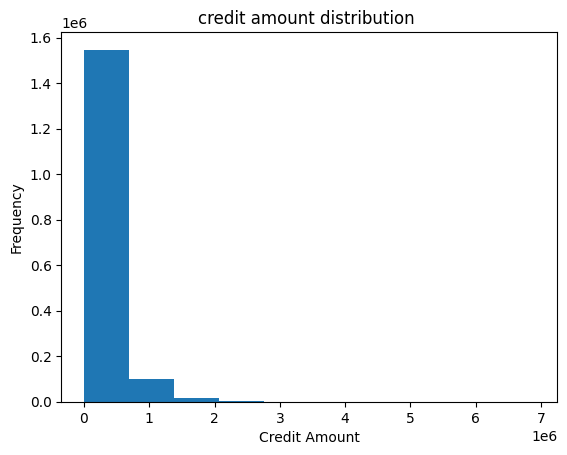

In [54]:
plt.hist(prev['AMT_CREDIT'])
plt.title("credit amount distribution ")
plt.xlabel('Credit Amount')
plt.ylabel('Frequency')
plt.show()

## bivariate

## Contract type Vs Contract status 

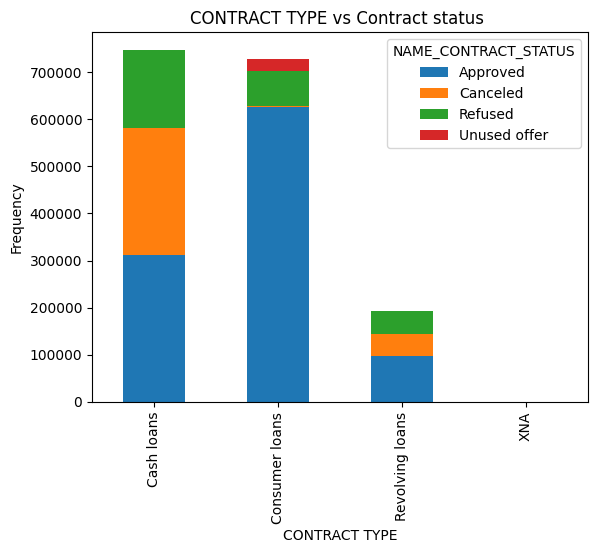

In [55]:
contract_target = pd.crosstab(prev["NAME_CONTRACT_TYPE"],prev['NAME_CONTRACT_STATUS'])
contract_target.plot(kind='bar',stacked=True)
plt.title('CONTRACT TYPE vs Contract status ')
plt.xlabel("CONTRACT TYPE" )
plt.ylabel('Frequency')
plt.show()

## Purpose of cash loan vs contract status 

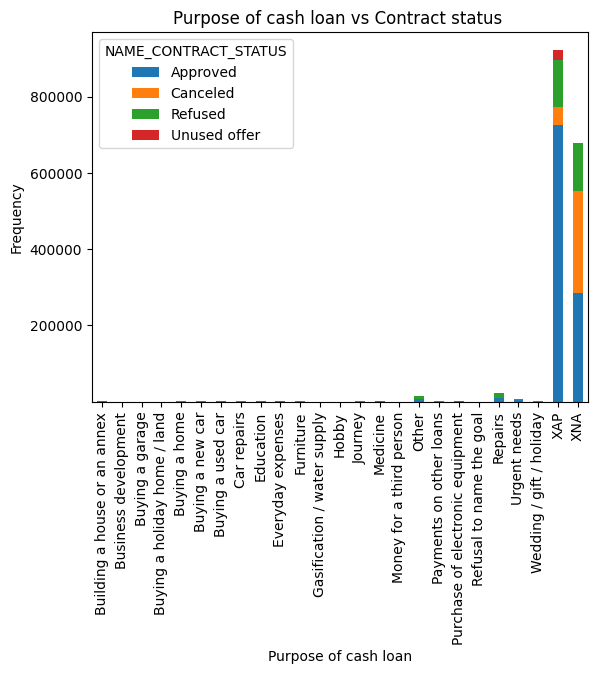

In [56]:
contract_target = pd.crosstab(prev["NAME_CASH_LOAN_PURPOSE"],prev['NAME_CONTRACT_STATUS'])
contract_target.plot(kind='bar',stacked=True)
plt.title('Purpose of cash loan vs Contract status ')
plt.xlabel("Purpose of cash loan" )
plt.ylabel('Frequency')
plt.show()

## Client type vs contract status 

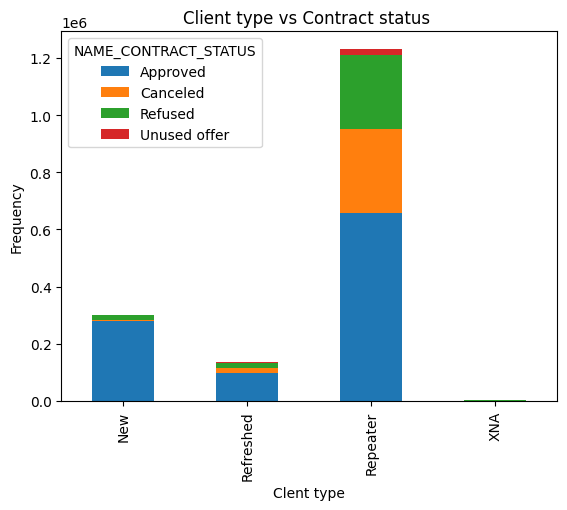

In [57]:
contract_target = pd.crosstab(prev["NAME_CLIENT_TYPE"],prev['NAME_CONTRACT_STATUS'])
contract_target.plot(kind='bar',stacked=True)
plt.title('Client type vs Contract status ')
plt.xlabel("Clent type" )
plt.ylabel('Frequency')
plt.show()

## Goods category vs contract status 

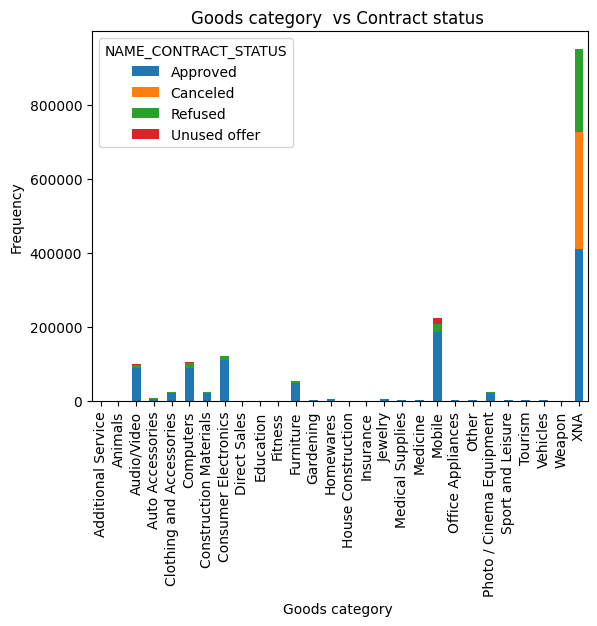

In [58]:
contract_target = pd.crosstab(prev["NAME_GOODS_CATEGORY"],prev['NAME_CONTRACT_STATUS'])
contract_target.plot(kind='bar',stacked=True)
plt.title('Goods category  vs Contract status ')
plt.xlabel("Goods category " )
plt.ylabel('Frequency')
plt.show()

## Interest rate vs contract status 

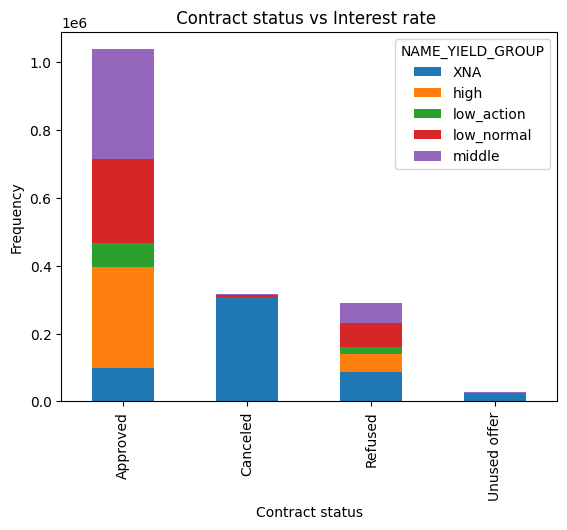

In [59]:
contract_target = pd.crosstab(prev['NAME_CONTRACT_STATUS'],prev["NAME_YIELD_GROUP"])
contract_target.plot(kind='bar',stacked=True)
plt.title(' Contract status vs Interest rate  ')
plt.xlabel("Contract status" )
plt.ylabel('Frequency')
plt.show()